In [1]:
from IPython.display import Image

In [2]:
!git clone https://github.com/MuhammadMoinFaisal/FireDetectionYOLOv8.git

Cloning into 'FireDetectionYOLOv8'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 188 (delta 29), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (188/188), 11.10 MiB | 16.35 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [3]:
!pwd


/content


In [4]:
%cd /content/FireDetectionYOLOv8


/content/FireDetectionYOLOv8


In [5]:
!pip install -e '.[dev]'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/FireDetectionYOLOv8
  Preparing metadata (setup.py) ... done
  Running setup.py develop for ultralytics


In [6]:
%cd /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect


/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect


In [7]:
!pip install roboflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="XP5Stfmku69v9XYdorkc")
project = rf.workspace("moin").project("fireandsmokedetection-j6e4d")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to FireandSmokeDetection-2 in yolov8:: 100%|██████████| 2653/2653 [00:00<00:00, 2772.09it/s]


In [9]:
HOME = '/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect'

In [10]:
%cd {HOME}

/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect


In [11]:
%cd {dataset.location}

/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/FireandSmokeDetection-2


In [12]:
%cd {HOME}

/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect


In [13]:
!python train.py model=yolov8m.pt data={dataset.location}/data.yaml epochs=120 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 285MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/FireandSmokeDetection-2/data.yaml, epochs=120, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nm

# Checking the files inside the Train folder

In [14]:
!ls /content/FireDetectionYOLOv8/runs/detect/train

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch7370.jpg
events.out.tfevents.1682770793.97af219ad524.5979.0  train_batch7371.jpg
F1_curve.png					    train_batch7372.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1.jpg


# Printing the Confusion Matrix

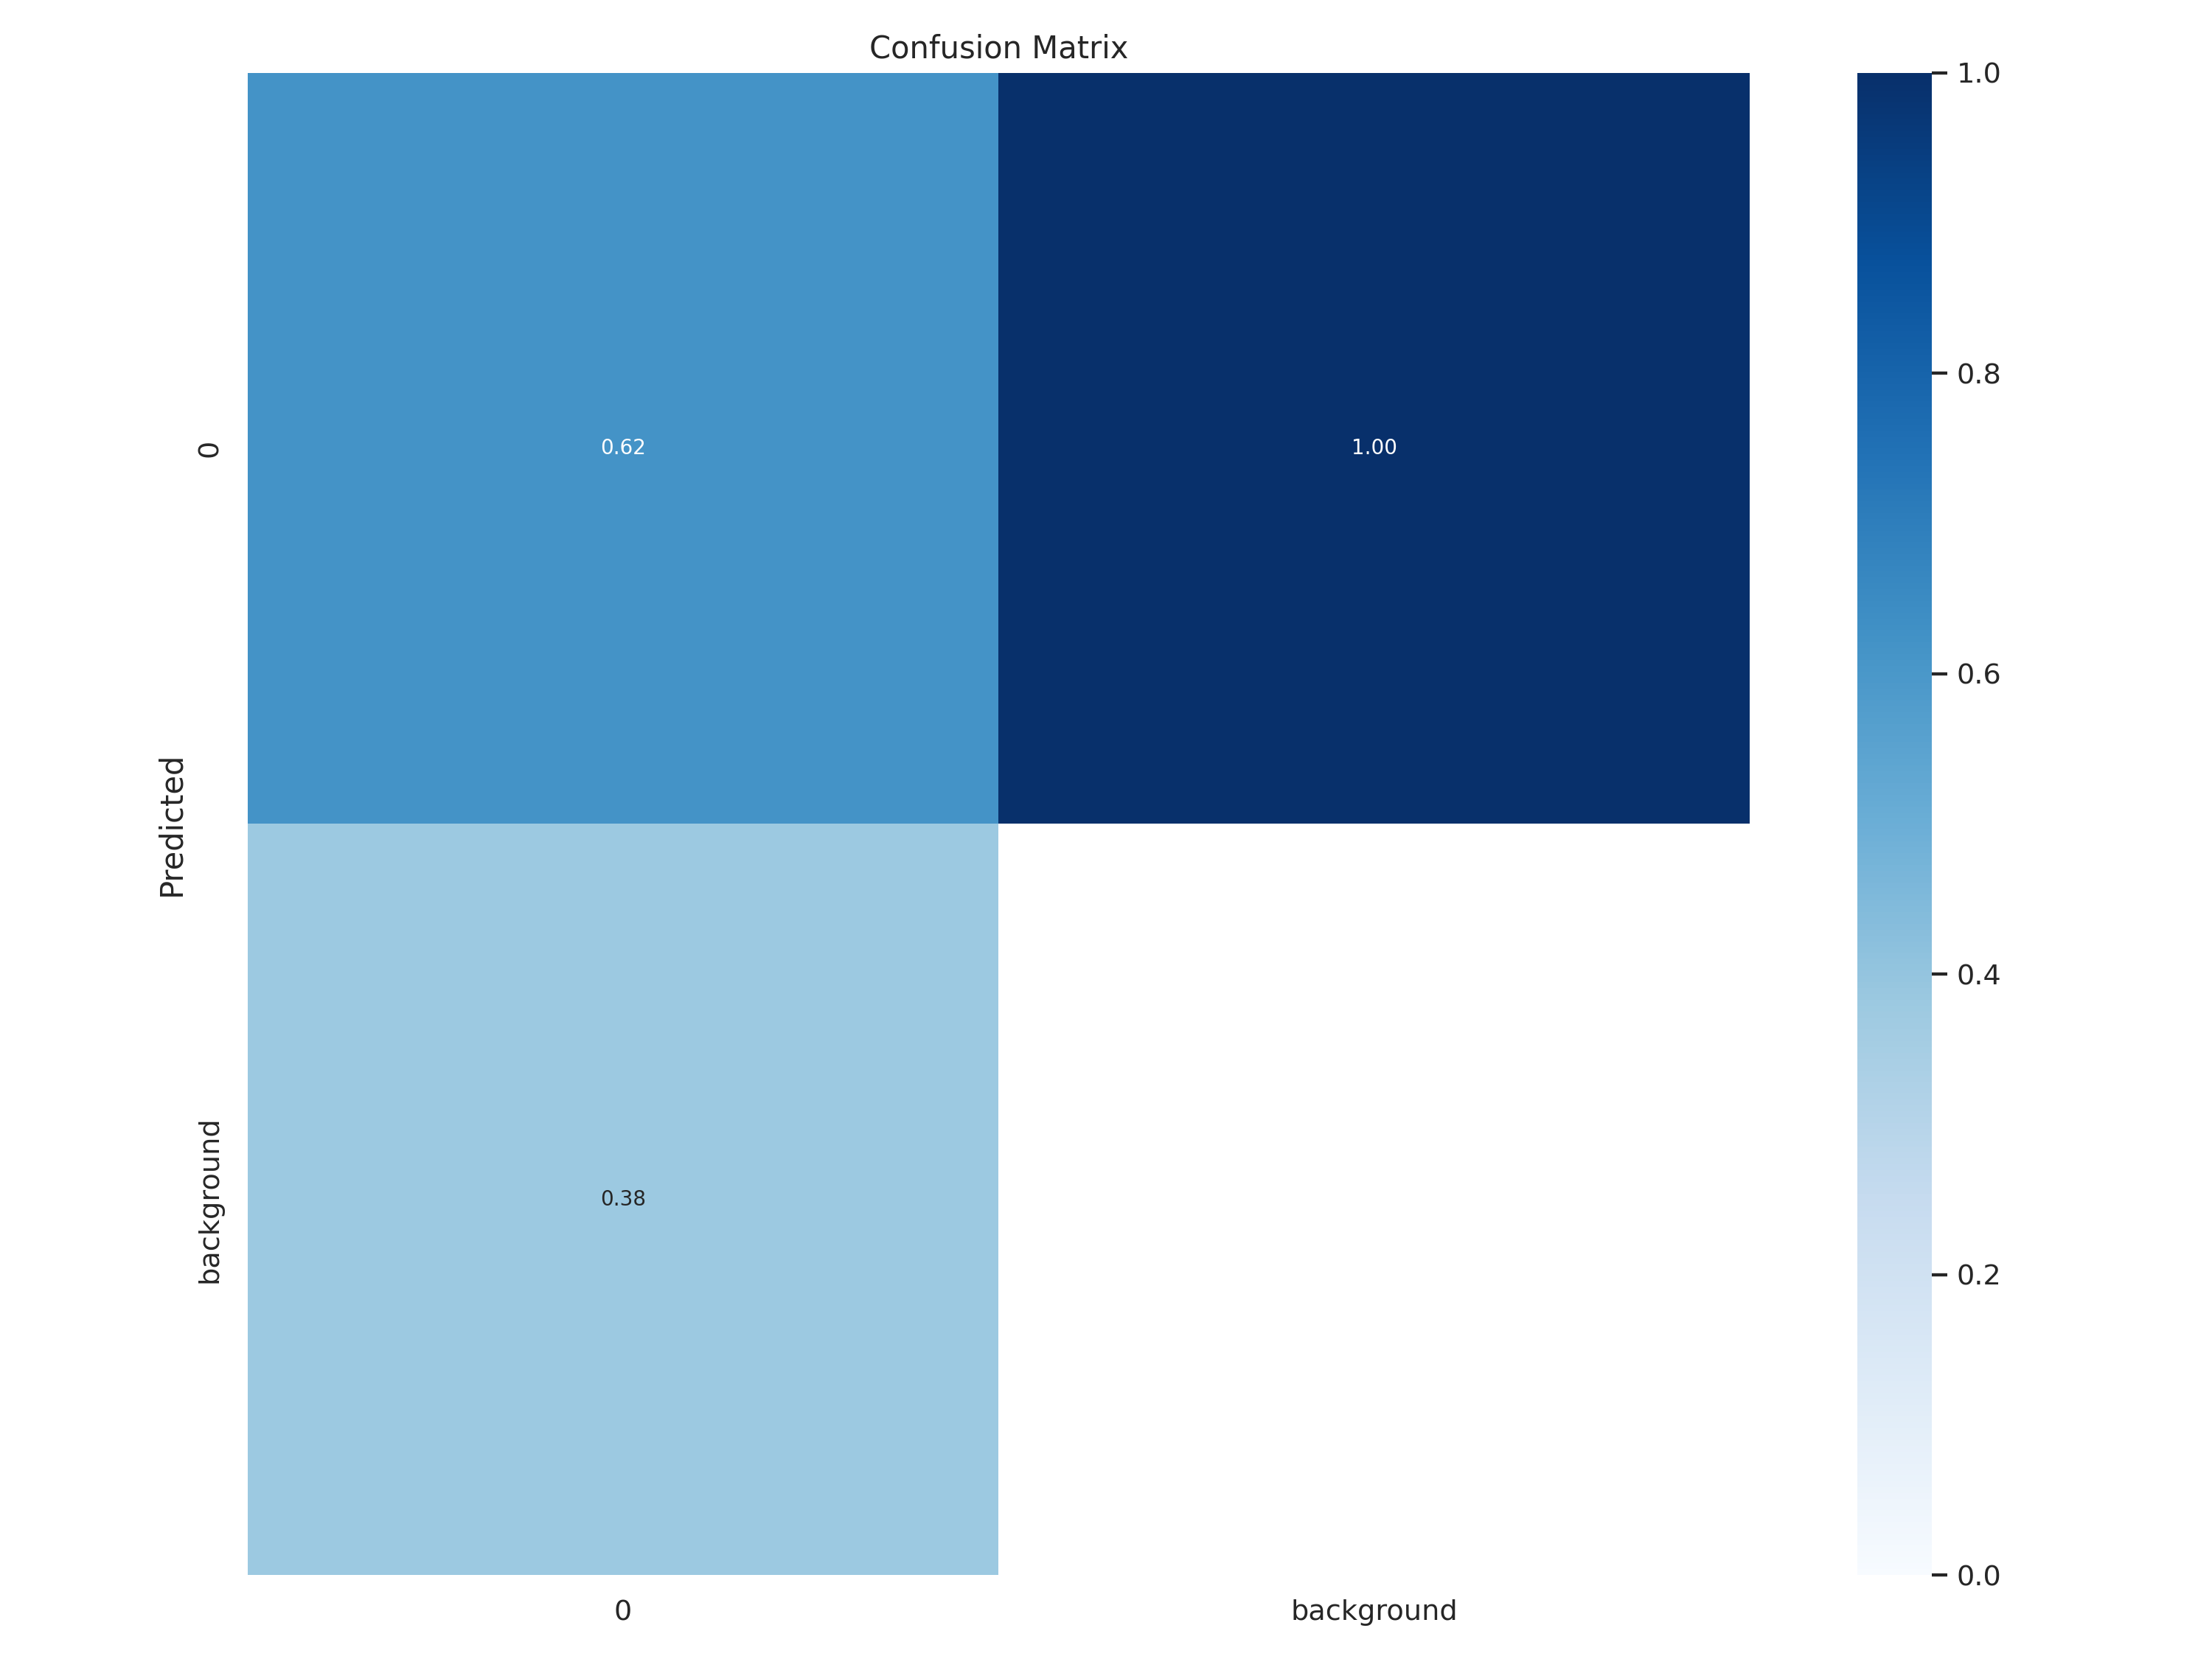

In [15]:
Image(filename = '/content/FireDetectionYOLOv8/runs/detect/train/confusion_matrix.png')

#Printing the Training and Validation Loss

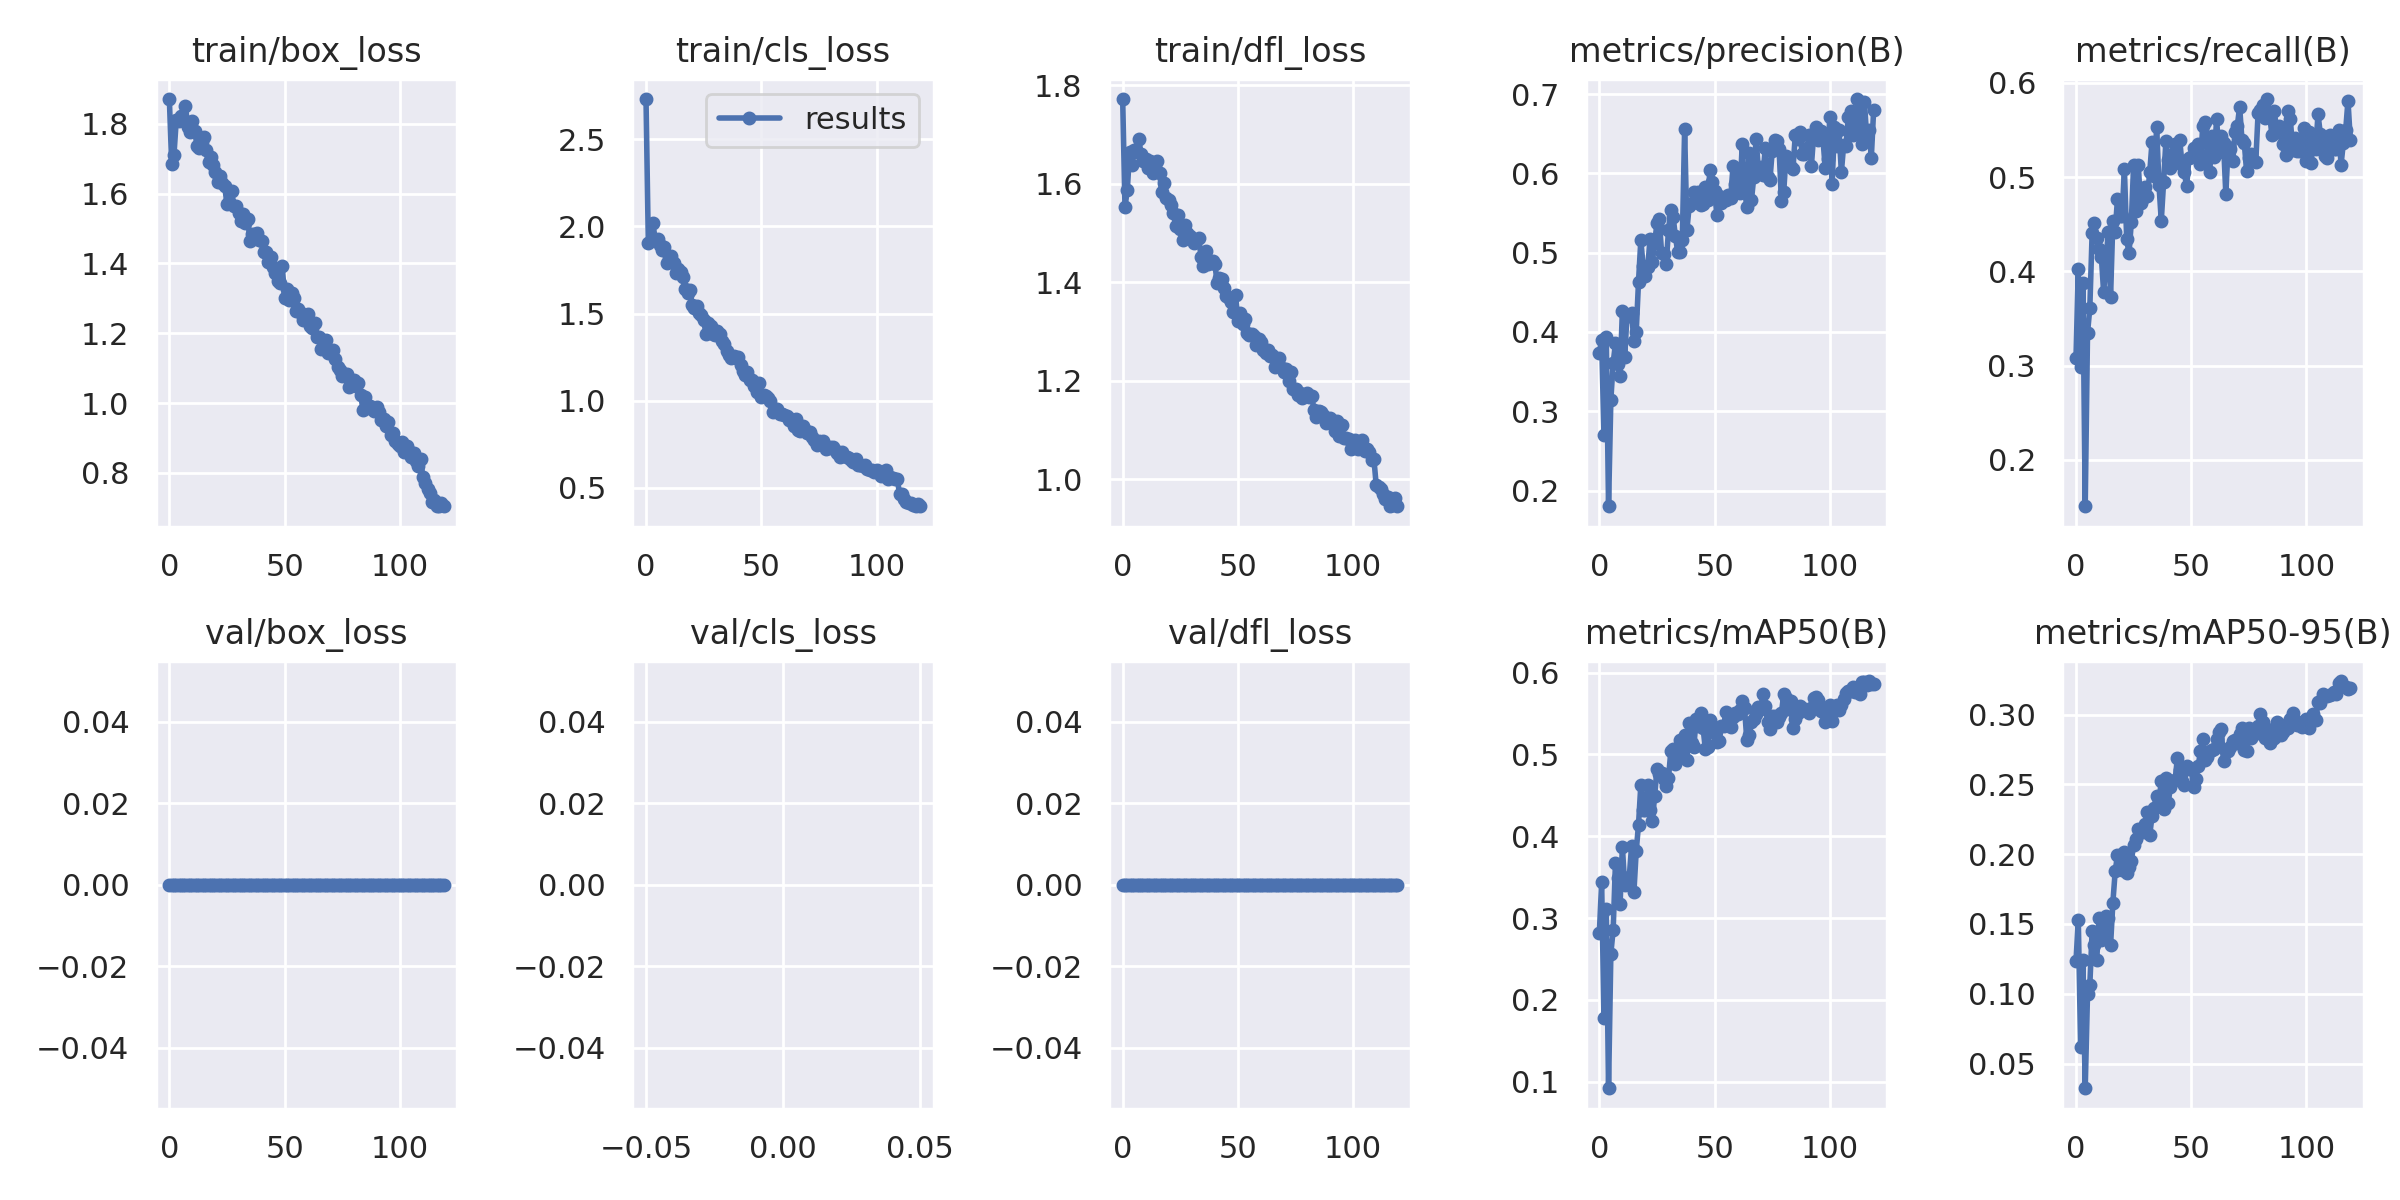

In [16]:
Image(filename = r'/content/FireDetectionYOLOv8/runs/detect/train/results.png', width = 800)

#Printing the Model Prediction on Validation Batch

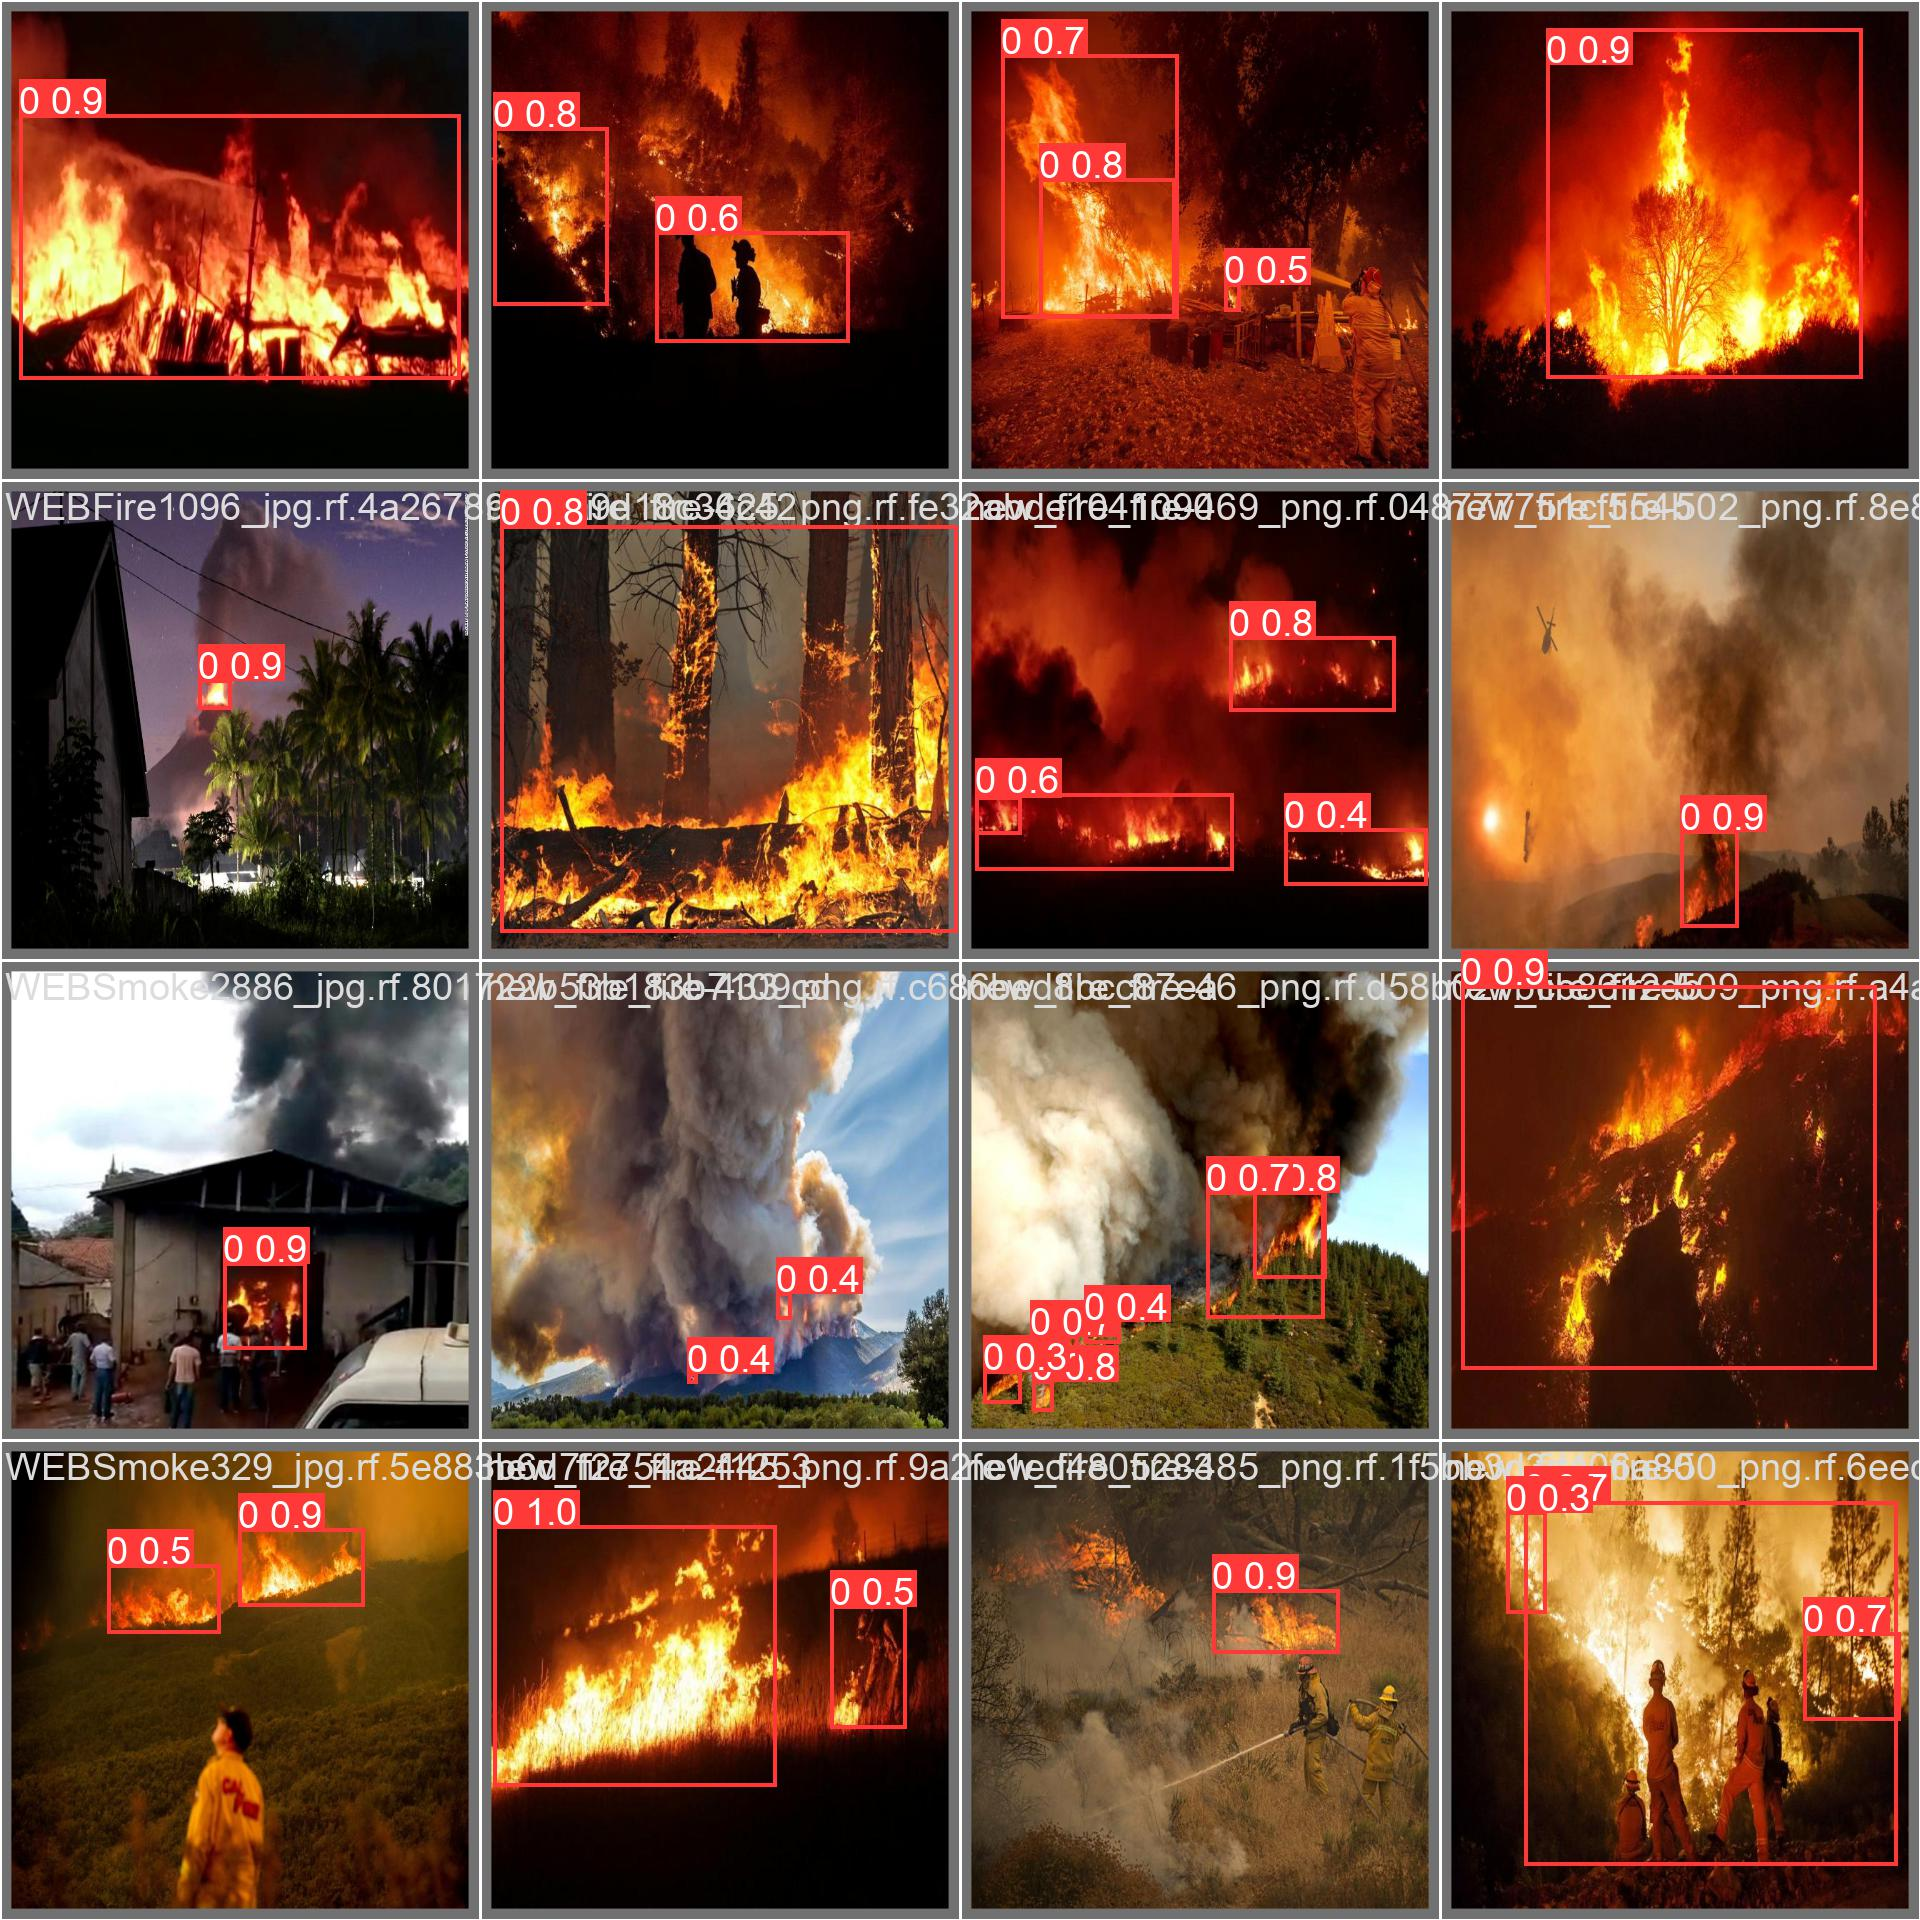

In [18]:
Image(filename = r'/content/FireDetectionYOLOv8/runs/detect/train/val_batch2_pred.jpg', width = 800)

#Validate Custom Model

In [19]:
!pwd

/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect


In [20]:
HOME = '/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect'

In [22]:
!python val.py model='/content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/best.pt' data={dataset.location}/data.yaml

2023-04-29 14:08:49.810757: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 14:08:51.580741: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/FireandSmokeDetection-2/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100% 264/264 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:10<00:00,  1.66it/s]
                   all        264        604      0.684      0.508      0.586

#Inference from Custom Model

###Demo Video 1

In [27]:
!python predict.py model='best.pt' source='demo2.mp4'

2023-04-29 14:13:17.098661: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 14:13:18.062510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/708) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo2.mp4: 384x640 1 0, 92.5ms
video 1/1 (2/708) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo2.mp4: 384x640 1 0, 26.5ms
video 1/1 (3/708) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo2.mp4: 384x640 1 0, 25.9ms
video 1/1 (4/708) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detec

In [28]:
!python predict.py model='best.pt' source='demo1.mp4'

2023-04-29 14:14:08.677906: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 14:14:09.657923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/450) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo1.mp4: 384x640 60.8ms
video 1/1 (2/450) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo1.mp4: 384x640 25.8ms
video 1/1 (3/450) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo1.mp4: 384x640 1 0, 25.8ms
video 1/1 (4/450) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo1.mp

In [29]:
!python predict.py model='best.pt' source='demo3.mp4'

2023-04-29 14:14:40.076024: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 14:14:41.830732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/475) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo3.mp4: 384x640 1 0, 60.2ms
video 1/1 (2/475) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo3.mp4: 384x640 1 0, 25.7ms
video 1/1 (3/475) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo3.mp4: 384x640 1 0, 25.7ms
video 1/1 (4/475) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detec

In [30]:
!python predict.py model='best.pt' source='demo4.mp4'

2023-04-29 14:15:10.946823: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 14:15:11.963531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/414) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo4.mp4: 384x640 1 0, 91.6ms
video 1/1 (2/414) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo4.mp4: 384x640 1 0, 25.8ms
video 1/1 (3/414) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detect/demo4.mp4: 384x640 1 0, 26.7ms
video 1/1 (4/414) /content/FireDetectionYOLOv8/ultralytics/yolo/v8/detec